In [1]:
import numpy as np
import pandas as pd

# Load dataset
dataset = pd.read_csv("/content/drive/MyDrive/Dataset/phishing.csv")
print("Dataset Loaded:")
print(dataset.head(5))


Dataset Loaded:
   Index  UsingIP  LongURL  ShortURL  Symbol@  Redirecting//  PrefixSuffix-  \
0      0        1        1         1        1              1             -1   
1      1        1        0         1        1              1             -1   
2      2        1        0         1        1              1             -1   
3      3        1        0        -1        1              1             -1   
4      4       -1        0        -1        1             -1             -1   

   SubDomains  HTTPS  DomainRegLen  ...  UsingPopupWindow  IframeRedirection  \
0           0      1            -1  ...                 1                  1   
1          -1     -1            -1  ...                 1                  1   
2          -1     -1             1  ...                 1                  1   
3           1      1            -1  ...                -1                  1   
4           1      1            -1  ...                 1                  1   

   AgeofDomain  DNSRecording

In [2]:
print("\nCek Missing Values di Setiap Kolom:")
print(dataset.isnull().sum())

# Mengecek apakah ada missing values dalam dataset secara keseluruhan
print("\nApakah Ada Missing Values di Dataset?")
print(dataset.isnull().values.any())

# Menampilkan baris yang memiliki missing values (jika ada)
print("\nBaris dengan Missing Values (jika ada):")
print(dataset[dataset.isnull().any(axis=1)])


Cek Missing Values di Setiap Kolom:
Index                  0
UsingIP                0
LongURL                0
ShortURL               0
Symbol@                0
Redirecting//          0
PrefixSuffix-          0
SubDomains             0
HTTPS                  0
DomainRegLen           0
Favicon                0
NonStdPort             0
HTTPSDomainURL         0
RequestURL             0
AnchorURL              0
LinksInScriptTags      0
ServerFormHandler      0
InfoEmail              0
AbnormalURL            0
WebsiteForwarding      0
StatusBarCust          0
DisableRightClick      0
UsingPopupWindow       0
IframeRedirection      0
AgeofDomain            0
DNSRecording           0
WebsiteTraffic         0
PageRank               0
GoogleIndex            0
LinksPointingToPage    0
StatsReport            0
class                  0
dtype: int64

Apakah Ada Missing Values di Dataset?
False

Baris dengan Missing Values (jika ada):
Empty DataFrame
Columns: [Index, UsingIP, LongURL, ShortURL, Sym

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Jumlah data untuk kelas -1: 4897
Jumlah data untuk kelas 1: 6157


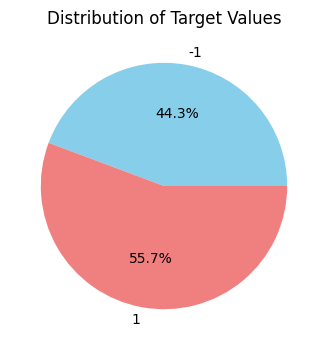

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Misalnya, X dan y sudah didefinisikan seperti di atas
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali target
y = dataset.iloc[:, -1].values   # Kolom target

# Menampilkan jumlah data untuk setiap kelas
unique_values, counts = np.unique(y, return_counts=True)
for label, count in zip(unique_values, counts):
    print(f'Jumlah data untuk kelas {label}: {count}')

# Membuat grafik pie chart
plt.figure(figsize=(6, 4))
plt.pie(counts, labels=unique_values, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Target Values')
plt.show()


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Standarisasi data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Terapkan PCA dengan mempertahankan 95% variansi
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_standardized)

# Menampilkan jumlah komponen yang dipilih
print(f"Jumlah komponen utama setelah PCA: {X_pca.shape[1]}")


Jumlah komponen utama setelah PCA: 24


In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


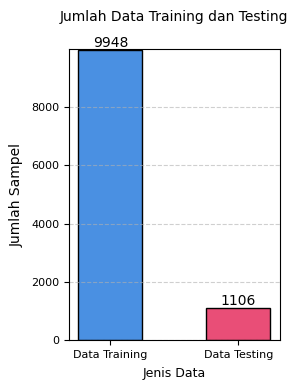

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Membagi data hasil PCA menjadi data pelatihan (70%) dan data pengujian (30%)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.1, random_state=42)

# Menampilkan dimensi data pelatihan dan pengujian
train_size = X_train_pca.shape[0]
test_size = X_test_pca.shape[0]

# Membuat grafik batang dengan desain yang lebih rapi
plt.figure(figsize=(3, 4))
plt.bar(['Data Training', 'Data Testing'], [train_size, test_size], color=['#4A90E2', '#E94E77'], width=0.5, edgecolor='black')

# Menambahkan label dan judul dengan jarak yang lebih baik
plt.xlabel('Jenis Data', fontsize=9, labelpad=5)
plt.ylabel('Jumlah Sampel', fontsize=10, labelpad=5)
plt.title('Jumlah Data Training dan Testing', fontsize=10, pad=20)  # Pad untuk jarak judul

# Mengatur skala dan tampilan grid
plt.ylim(0, max(train_size, test_size) + 50)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Menampilkan nilai di atas batang
for i, v in enumerate([train_size, test_size]):
    plt.text(i, v + 5, f'{v}', ha='center', va='bottom', fontsize=10, color='black')

# Menyempurnakan tampilan
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.svm import SVC

model = SVC(C=1, gamma=0.1, kernel='rbf')
model.fit(X_train_pca, y_train)


SVC(C=1, gamma=0.1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {'C': [1], 'gamma': [0.1], 'kernel': ['rbf']}

SVC = GridSearchCV(SVC(), param_grid)


SVC.fit(X_train_pca, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1], 'gamma': [0.1], 'kernel': ['rbf']})


Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96       502
           1       0.96      0.97      0.97       604

    accuracy                           0.96      1106
   macro avg       0.96      0.96      0.96      1106
weighted avg       0.96      0.96      0.96      1106


Accuracy: 0.96


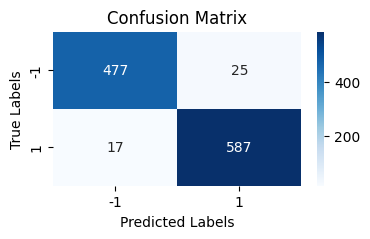

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test_pca)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Membuat visualisasi confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

